In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
#load csv file
race20 = pd.read_csv('inference_result_race20.csv')
race20.head()

,input_text,answer,generated_output
0,A chat between a curious user and an artificia...,D,"[""<s> A chat between a curious user and an art..."
1,A chat between a curious user and an artificia...,A,"[""<s> A chat between a curious user and an art..."
2,A chat between a curious user and an artificia...,B,['<s> A chat between a curious user and an art...
3,A chat between a curious user and an artificia...,D,['<s> A chat between a curious user and an art...
4,A chat between a curious user and an artificia...,A,['<s> A chat between a curious user and an art...


In [158]:
import re

def extract_answer_and_confidence(output):
    # Extracting answer using regular expression
    answer_match = re.search(r"\[Answer\]:\s*([A-D])", output)
    answer = answer_match.group(1) if answer_match else None

    # Extracting confidence level using regular expression
    confidence_match = re.search(r"\[Confidence \(0-100\)\]:\s*(\d+)%", output)
    confidence = int(confidence_match.group(1)) if confidence_match else None

    return {"Answer": answer, "Confidence": confidence}

# Example usage with the provided output
output_example = race20['generated_output'][4]
result = extract_answer_and_confidence(output_example)

# Print the extracted information
print(result)

{'Answer': 'A', 'Confidence': 100}


In [159]:
# Apply the function to the entire column
race20['answer_confidence'] = race20['generated_output'].apply(extract_answer_and_confidence)

In [160]:
#sepearate answer and confidence
race20['predicted_answer'] = race20['answer_confidence'].apply(lambda x: x['Answer'])
race20['confidence'] = race20['answer_confidence'].apply(lambda x: x['Confidence'])

In [161]:
def compute_ece_and_plot_reliability_diagram(df, num_bins=10):
    # Check if confidence values are in the range [0, 1]
    if df['confidence'].max() > 1.0:
        df['confidence'] /= 100.0
    
    # Calculate accuracy for each prediction
    df['correct'] = df['answer'] == df['predicted_answer']

    # Create bins based on confidence values
    df['bin'] = pd.cut(df['confidence'], bins=num_bins, labels=False)

    # Calculate average accuracy and confidence for each bin
    bin_stats = df.groupby('bin').agg({'correct': 'mean', 'confidence': 'mean'}).reset_index()

    # Calculate ECE
    ece = (bin_stats['correct'] - bin_stats['confidence']).abs().mean()

    # Plot reliability diagram
    plt.figure(figsize=(4, 4))
    plt.plot(bin_stats['confidence'], bin_stats['correct'], marker='o', linestyle='-', color='blue', label='Reliability Diagram')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfectly Calibrated')

    plt.title(f'Reliability Diagram\nExpected Calibration Error (ECE): {round(ece, 4)}')
    plt.xlabel('Mean Predicted Confidence')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(f"The ece is {round(ece, 4)}")
    print(f"The accuracy is {round(df['correct'].mean(), 4)}")
    
    #Overconfident illusions的定义：判断错误并且confidence > 0.85 (这里是一个threshold) 统计这种现象占测试集总数的多少
    overconfident_illusions = df[(df['correct'] == False) & (df['confidence'] > 0.85)].shape[0] / df.shape[0]
    print(f"The overconfident illusions is {round(overconfident_illusions, 4)}")
    return

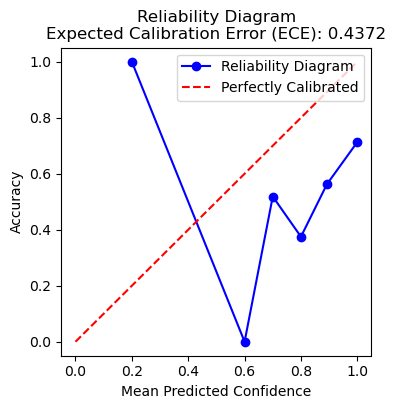

The ece is 0.4372
The accuracy is 0.635
The overconfident illusions is 0.225


In [162]:
compute_ece_and_plot_reliability_diagram(race20, 10)

In [163]:
race20cot = pd.read_csv('race20_cot_human_labeled.csv')
race20cot.head()

,input_text,answer,generated_output,predicted_answer,confidence
0,A chat between a curious user and an artificia...,D,"[""<s> A chat between a curious user and an art...",D,100.0
1,A chat between a curious user and an artificia...,A,"[""<s> A chat between a curious user and an art...",D,60.0
2,A chat between a curious user and an artificia...,B,['<s> A chat between a curious user and an art...,B,100.0
3,A chat between a curious user and an artificia...,D,['<s> A chat between a curious user and an art...,D,100.0
4,A chat between a curious user and an artificia...,A,['<s> A chat between a curious user and an art...,A,100.0


In [83]:
# # Apply the function to the entire column
# race20cot['answer_confidence'] = race20cot['generated_output'].apply(extract_answer_and_confidence)

In [84]:
# race20cot['predicted_answer'] = race20cot['answer_confidence'].apply(lambda x: x['Answer'])
# race20cot['confidence'] = race20cot['answer_confidence'].apply(lambda x: x['Confidence'])

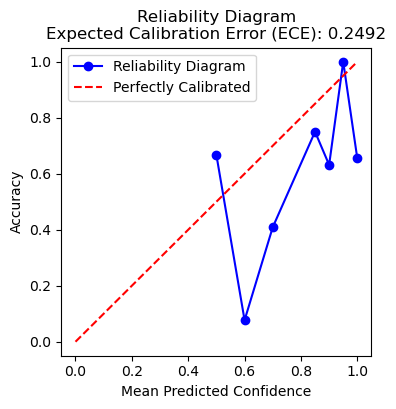

The ece is 0.2492
The accuracy is 0.585
The overconfident illusions is 0.27


In [164]:
compute_ece_and_plot_reliability_diagram(race20cot, 10)

In [165]:
vicuna = pd.read_csv('inference_result_vicuna.csv')
vicuna.head()

,input_text,answer,generated_output
0,A chat between a curious user and an artificia...,D,"[""<s> A chat between a curious user and an art..."
1,A chat between a curious user and an artificia...,A,"[""<s> A chat between a curious user and an art..."
2,A chat between a curious user and an artificia...,B,['<s> A chat between a curious user and an art...
3,A chat between a curious user and an artificia...,D,['<s> A chat between a curious user and an art...
4,A chat between a curious user and an artificia...,A,['<s> A chat between a curious user and an art...


In [166]:
# Apply the function to the entire column
vicuna['answer_confidence'] = vicuna['generated_output'].apply(extract_answer_and_confidence)

In [167]:
vicuna['predicted_answer'] = vicuna['answer_confidence'].apply(lambda x: x['Answer'])
vicuna['confidence'] = vicuna['answer_confidence'].apply(lambda x: x['Confidence'])

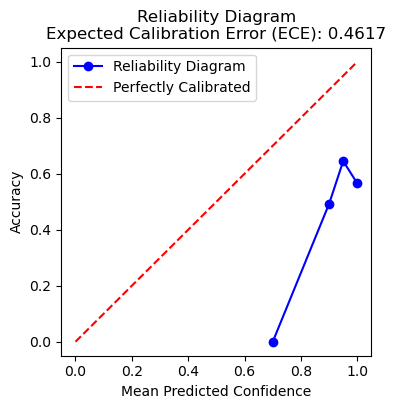

The ece is 0.4617
The accuracy is 0.505
The overconfident illusions is 0.455


In [168]:
compute_ece_and_plot_reliability_diagram(vicuna, 10)

(array([  3.,   0.,  13.,   0.,  22.,   0.,   4.,   0.,  19., 137.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 10 artists>)

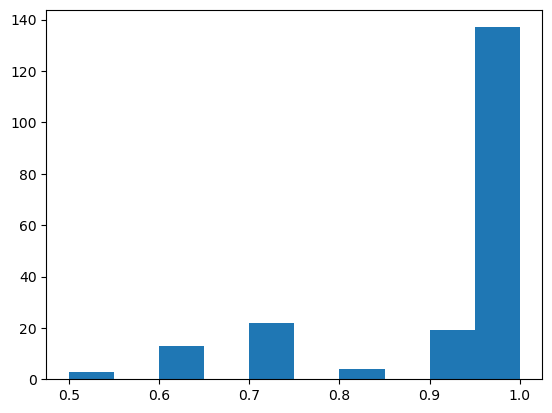

In [169]:
#histogram of confidence of vicuna
plt.hist(race20cot['confidence'], bins=10)

count    197.000000
mean       0.914467
std        0.048774
min        0.700000
25%        0.900000
50%        0.900000
75%        0.950000
max        1.000000
Name: confidence, dtype: float64

In [174]:
print(race20cot['predicted_answer'].count())

183


In [175]:
print(race20['predicted_answer'].count())

191


In [176]:
print(vicuna['predicted_answer'].count())

180
